# Участники

- Пустотин Даниил

- Анашкин Илья

В качестве сенсора мы решили выбрать обычный смартфон, а в качестве данных - показатели различных гироскопов в смартфоне, с целью определения движения или нахождения в состоянии покоя устройства

Дисклеймер: эксперимент вышел достаточно сложным, но на минимальном уровне интересным. В данной области все еще есть множество подводных камней в opensource. В этом файле будет небольшой обзор о них в конце

In [16]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Обзор данных

`attitude` - ориентация девайса относительно заданной системы координат

`rotationRate` - структура, которая содержит данные, определяющие скорость вращения устройства вокруг трех осей

`gravity` - вектор гравитационного ускорения, выраженный в системе отсчета устройства

`userAcceleration` - ускорение, которое придает девайсу пользователь

`gravity + userAcceleration` можно трактовать как общее ускорение устройства

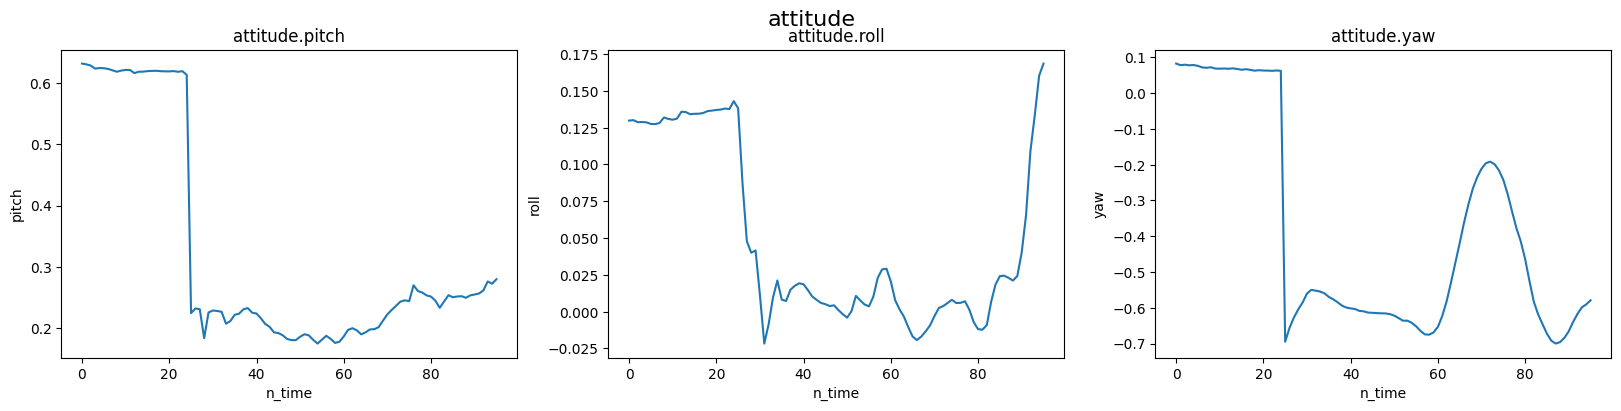

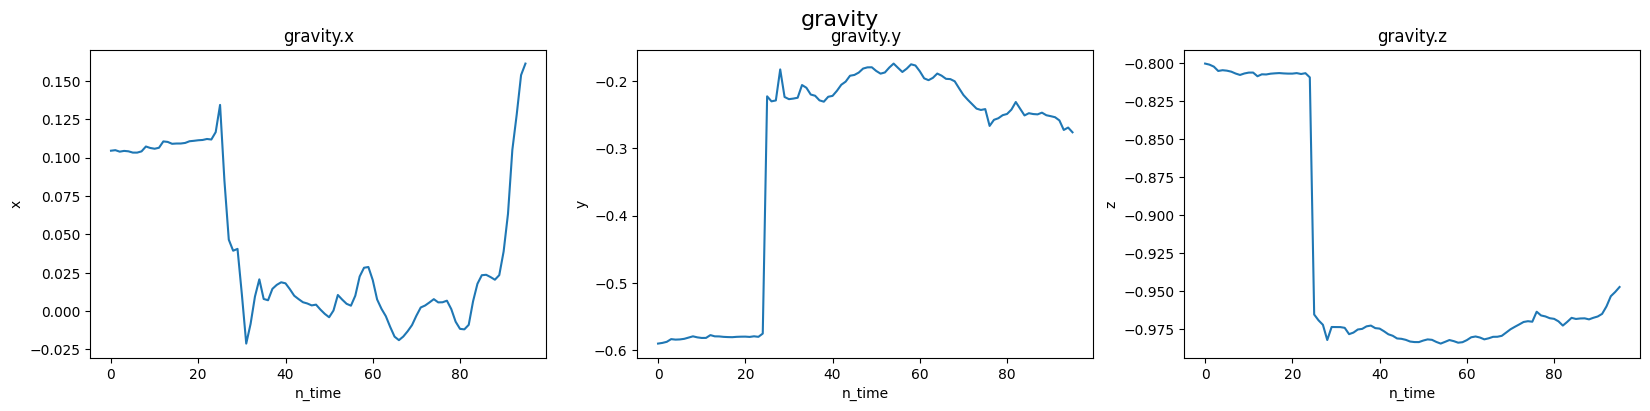

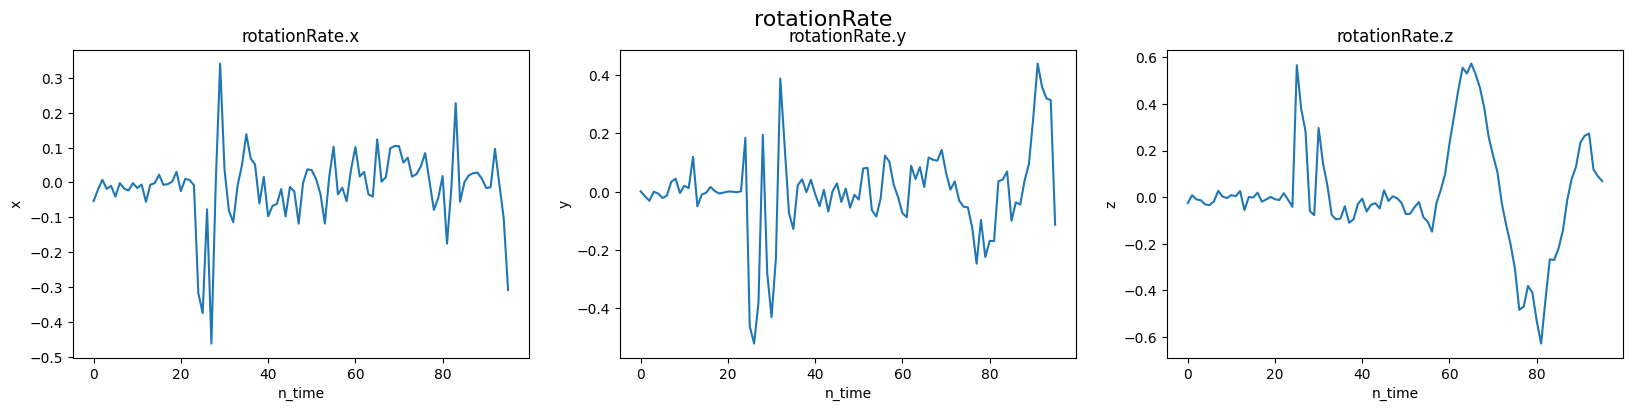

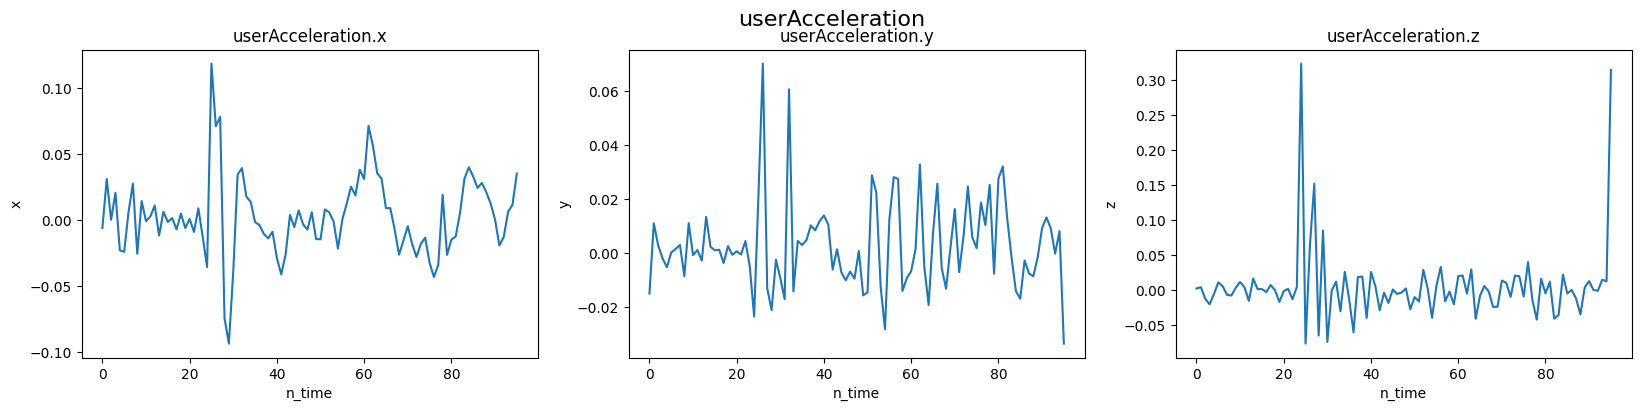

In [17]:
file = open('MotionData/InHandStaying/in_hand_staying_1.json')
data = json.load(file)
df = pd.json_normalize(data)
df.drop(['timestamp'], axis=1, inplace=True)
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    fig, ax = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle(group_name, fontsize=16)

    elem_name = []
    if group_name == 'attitude':
        elem_name = ['pitch', 'roll', 'yaw']
    else:
        elem_name = ['x', 'y', 'z']
    for i in range(3):
        metric_name = f'{group_name}.{elem_name[i]}'
        ax[i].plot(df.index, df[metric_name])
        ax[i].set_title(metric_name)
        ax[i].set_xlabel('n_time')
        ax[i].set_ylabel(elem_name[i])

# In Hand Staying

Отобразим данные, когда человек просто стоит с телефоном на примере двух разных экспериментов

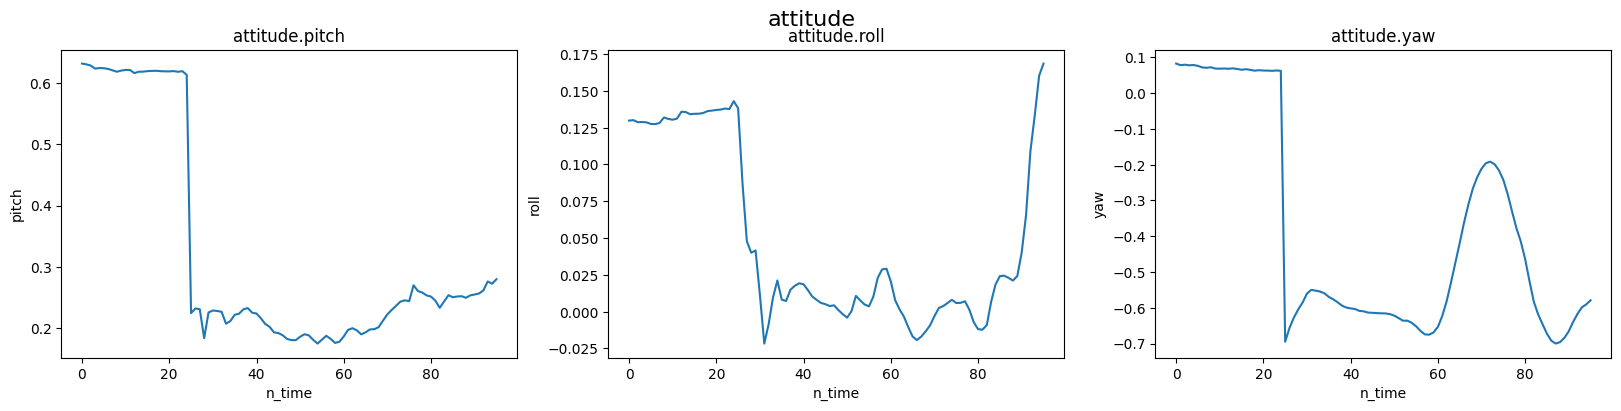

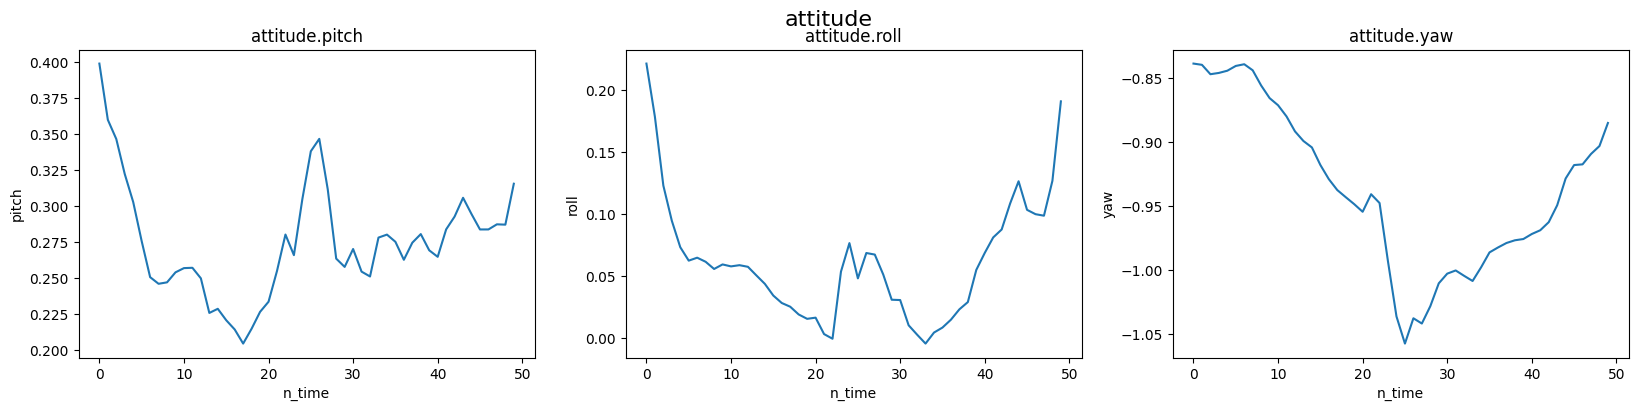

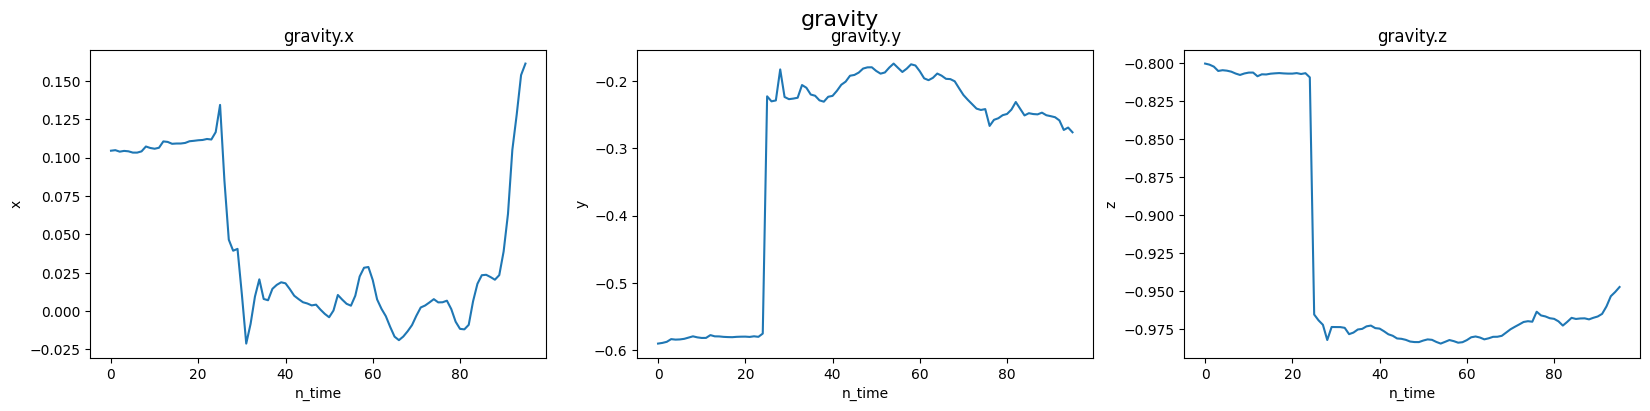

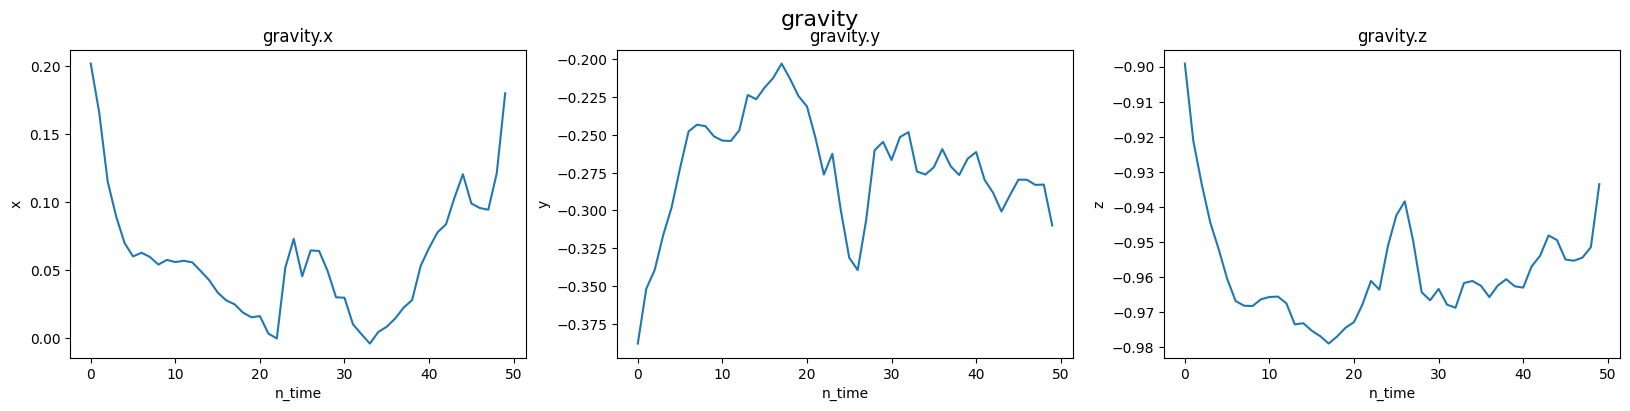

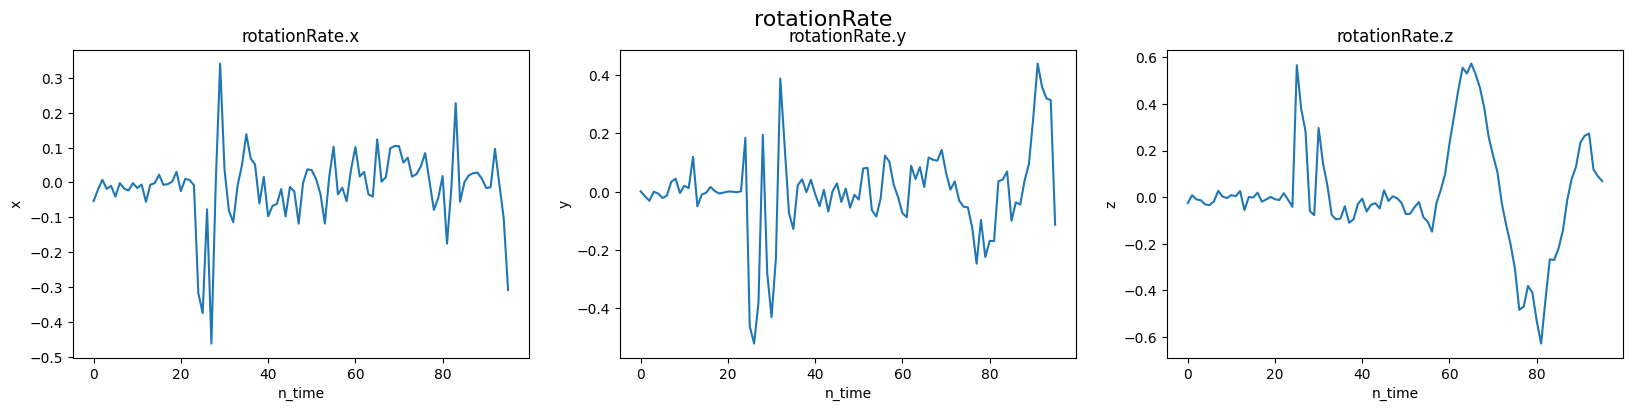

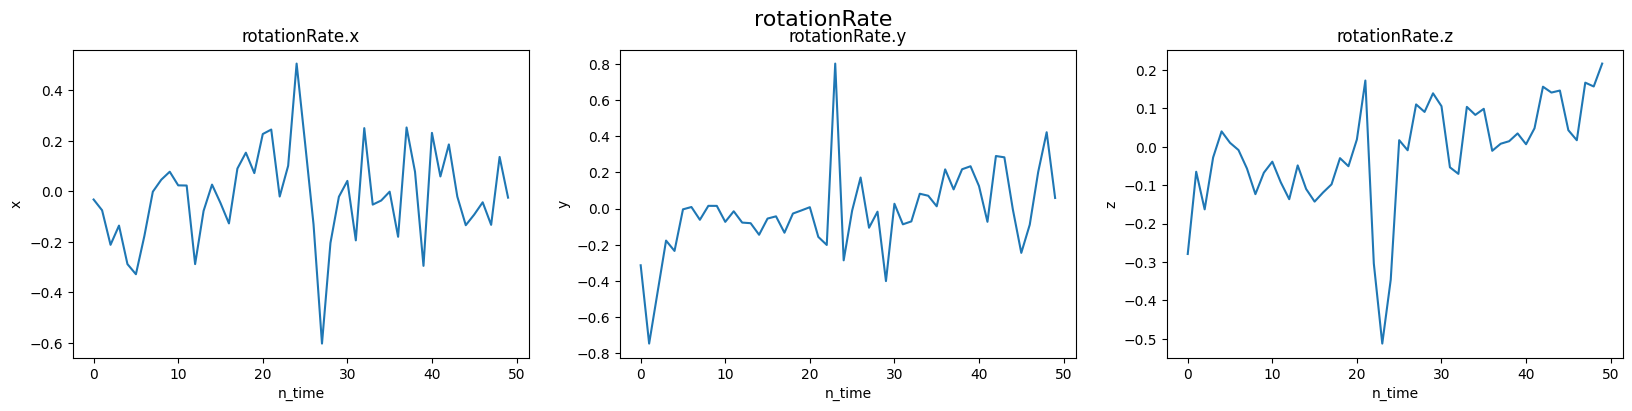

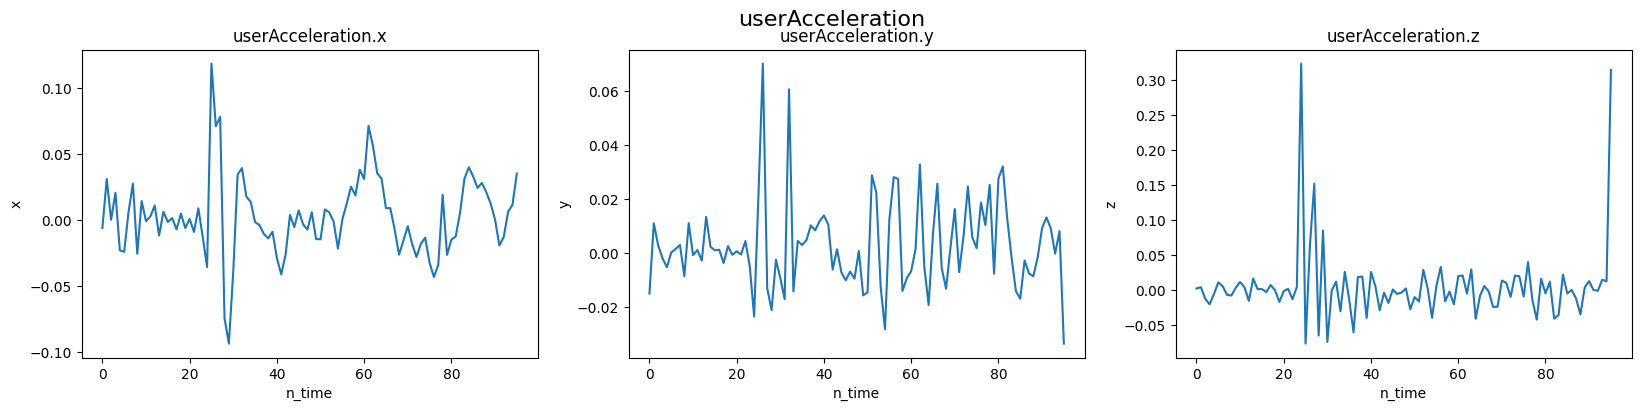

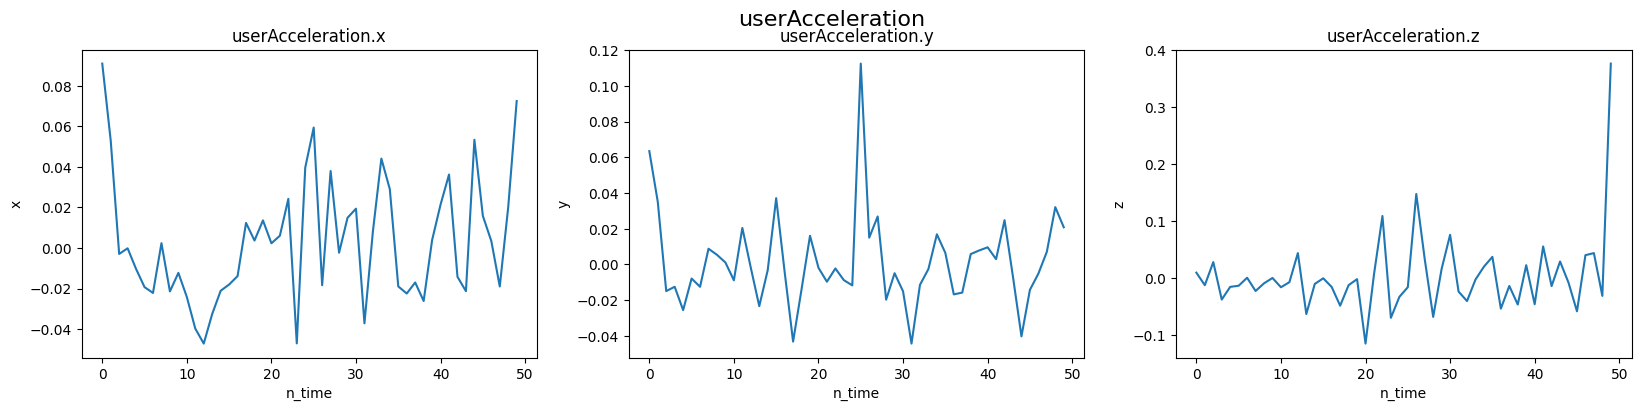

In [18]:
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    for num in range(1, 3):
        file = open(f'MotionData/InHandStaying/in_hand_staying_{num}.json')
        data = json.load(file)
        df = pd.json_normalize(data)
        df.drop(['timestamp'], axis=1, inplace=True)
        fig, ax = plt.subplots(1, 3, figsize=(20, 4))
        fig.suptitle(group_name, fontsize=16)

        elem_name = []
        if group_name == 'attitude':
            elem_name = ['pitch', 'roll', 'yaw']
        else:
            elem_name = ['x', 'y', 'z']
        for i in range(3):
            metric_name = f'{group_name}.{elem_name[i]}'
            ax[i].plot(df.index, df[metric_name])
            ax[i].set_title(metric_name)
            ax[i].set_xlabel('n_time')
            ax[i].set_ylabel(elem_name[i])

Сравнивать графики в данном эксперименте достаточно плохая затея, потому что они совсем не похожи друг на друга, в отличие от границ чисел. Попробуем поработать с минимальными, средними и максимальными значениями каждой из метрик

In [19]:
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    elem_name = []
    if group_name == 'attitude':
        elem_name = ['pitch', 'roll', 'yaw']
    else:
        elem_name = ['x', 'y', 'z']
    for i in range(3):
        for num in range(1, 7):
            file = open(f'MotionData/InHandStaying/in_hand_staying_{num}.json')
            data = json.load(file)
            df = pd.json_normalize(data)
            df.drop(['timestamp'], axis=1, inplace=True)

            metric_name = f'{group_name}.{elem_name[i]}'
            print(metric_name, '\t', round(np.min(df[metric_name]), 3), round(np.mean(df[metric_name]), 3), round(np.max(df[metric_name]), 3))

attitude.pitch 	 0.175 0.325 0.631
attitude.pitch 	 0.204 0.275 0.399
attitude.pitch 	 0.145 0.221 0.308
attitude.pitch 	 0.185 0.223 0.252
attitude.pitch 	 0.221 0.249 0.278
attitude.pitch 	 0.198 0.257 0.307
attitude.roll 	 -0.022 0.049 0.168
attitude.roll 	 -0.004 0.061 0.221
attitude.roll 	 -0.144 -0.015 0.056
attitude.roll 	 -0.005 0.016 0.036
attitude.roll 	 -0.029 0.018 0.042
attitude.roll 	 -0.017 0.03 0.11
attitude.yaw 	 -0.7 -0.384 0.082
attitude.yaw 	 -1.058 -0.937 -0.839
attitude.yaw 	 -1.018 -0.826 -0.529
attitude.yaw 	 1.123 1.179 1.21
attitude.yaw 	 0.768 0.851 0.883
attitude.yaw 	 1.105 1.188 1.209
gravity.x 	 -0.021 0.042 0.161
gravity.x 	 -0.004 0.058 0.202
gravity.x 	 -0.138 -0.014 0.055
gravity.x 	 -0.005 0.015 0.035
gravity.x 	 -0.029 0.017 0.04
gravity.x 	 -0.017 0.029 0.105
gravity.y 	 -0.59 -0.313 -0.174
gravity.y 	 -0.388 -0.271 -0.203
gravity.y 	 -0.304 -0.219 -0.144
gravity.y 	 -0.25 -0.221 -0.184
gravity.y 	 -0.274 -0.246 -0.219
gravity.y 	 -0.303 -0.254 -0.

Здесь уже можно заметить некоторую закономерность: во время состояния `stay` метрики имеют небольшую разницу между минимальным и максимальным значением (что вполне логично). Возьмем состояние `walking` и посмотрим на пределы там также на основе двух экспериментов (даже на примере двух разных людей):

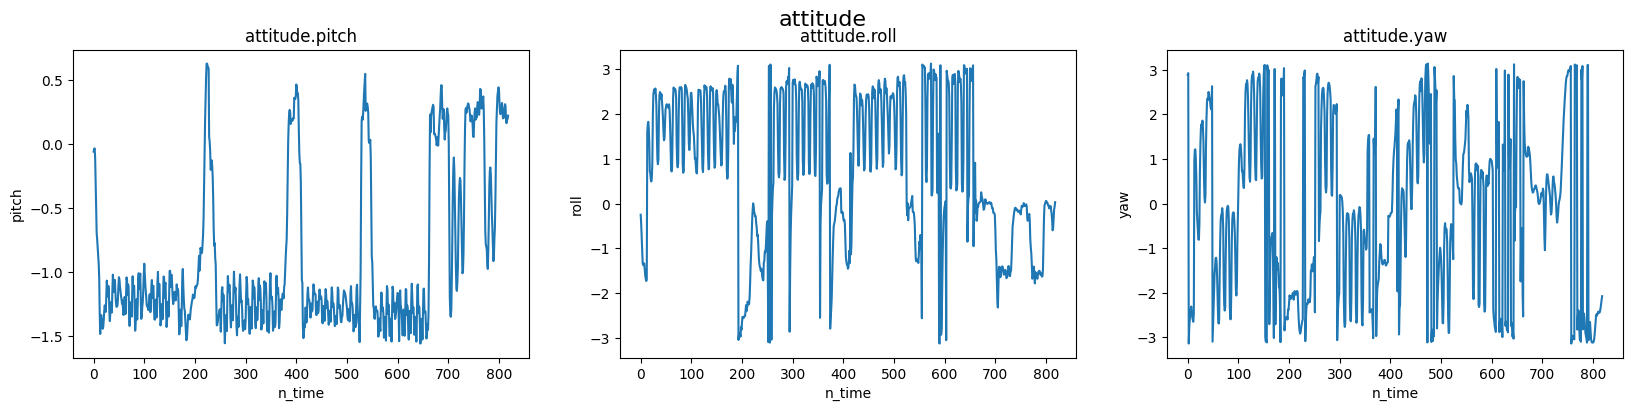

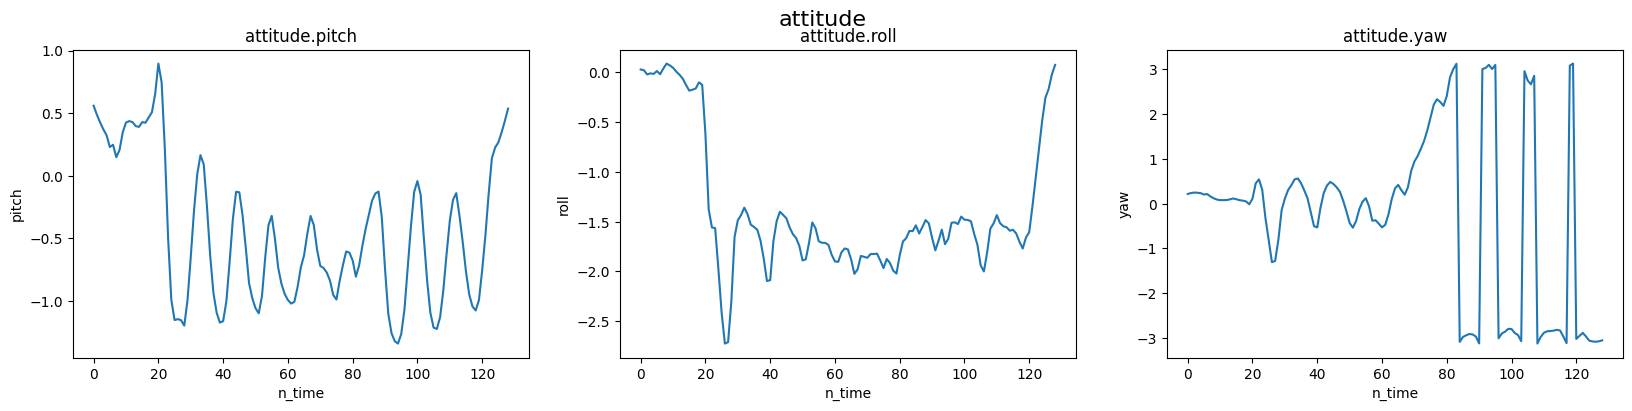

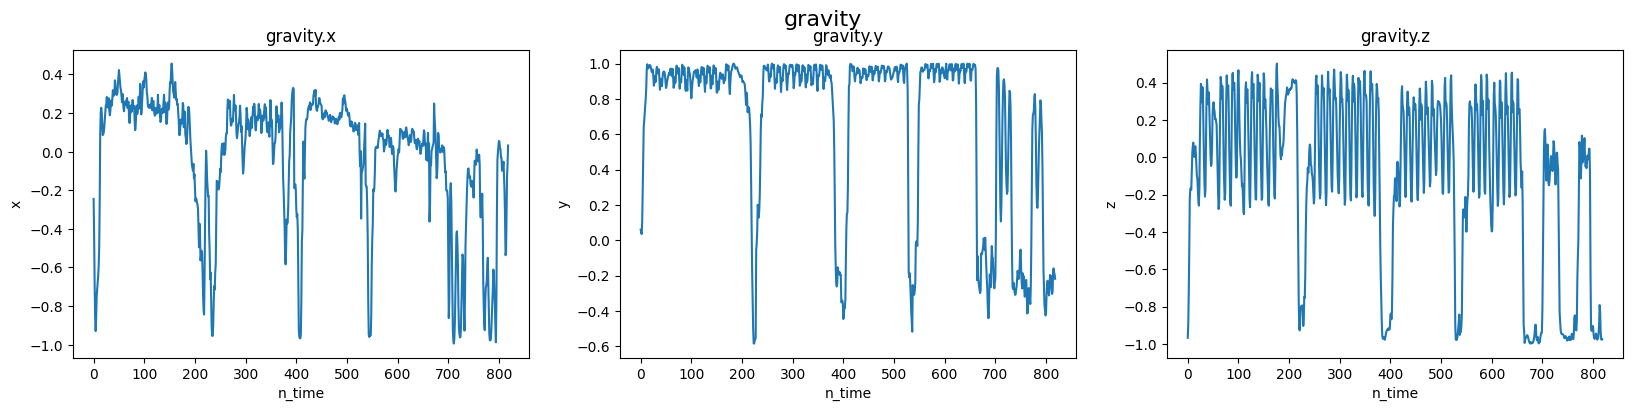

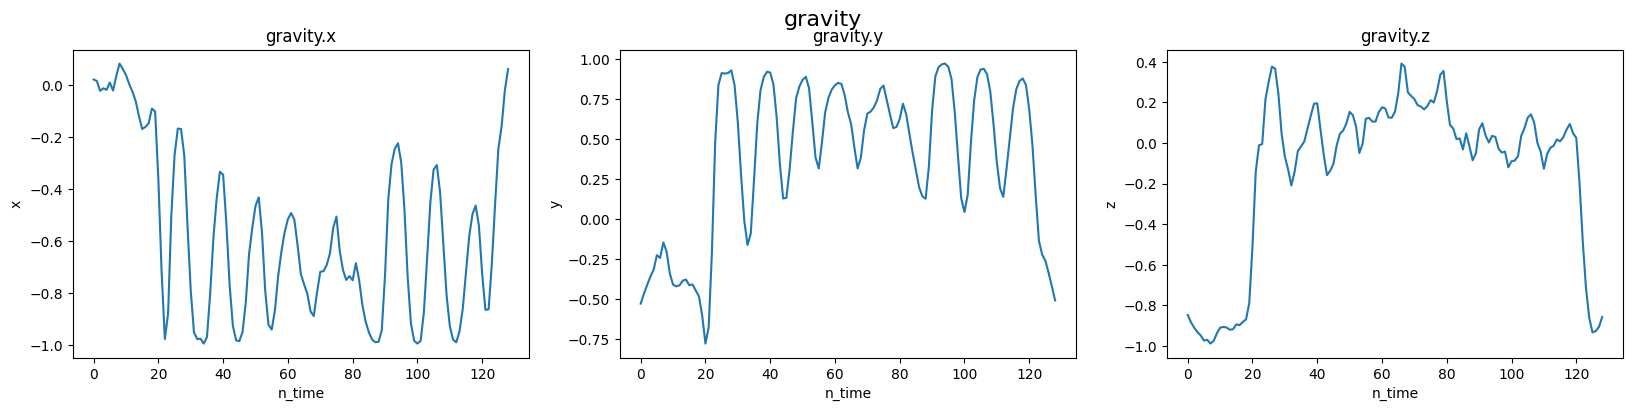

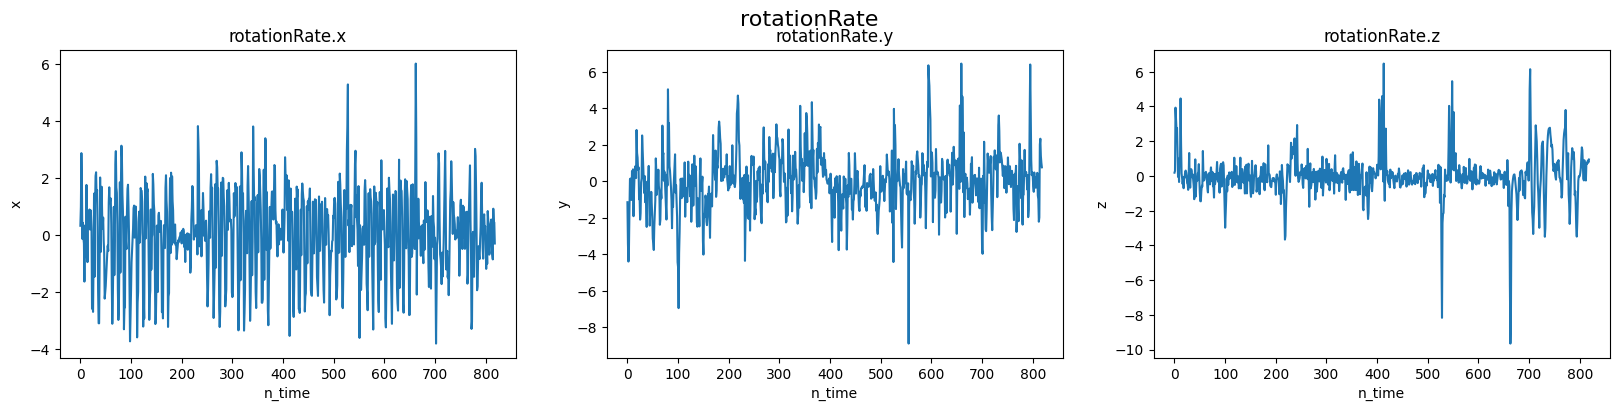

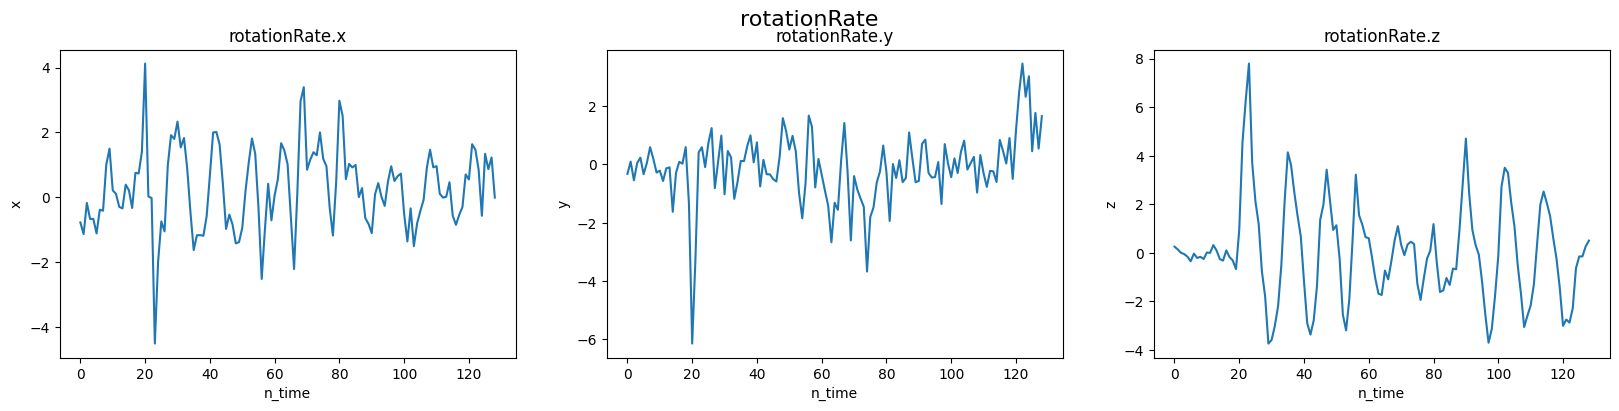

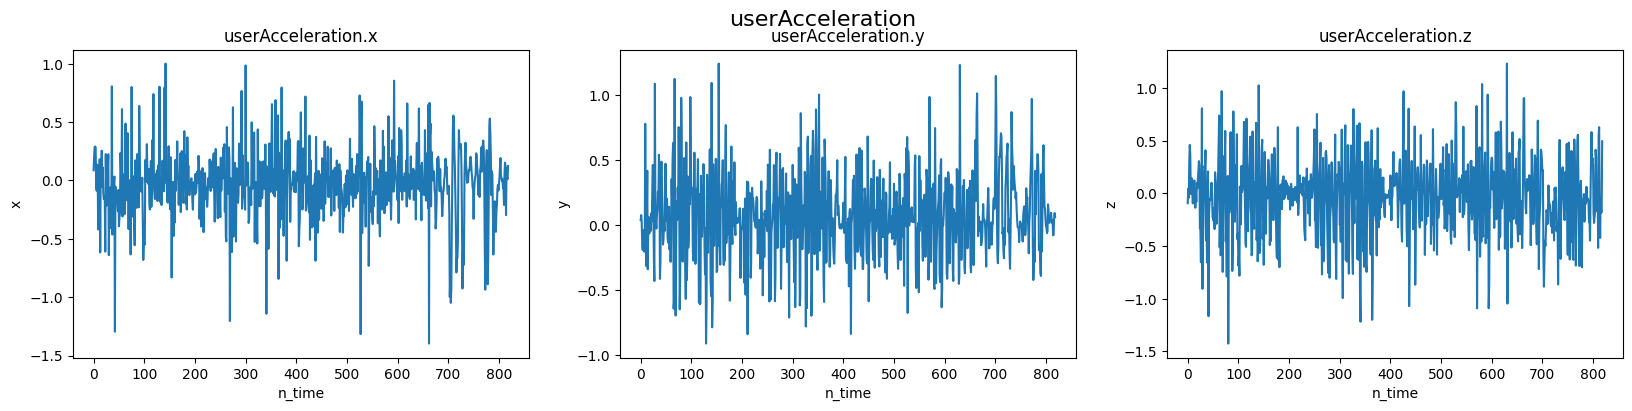

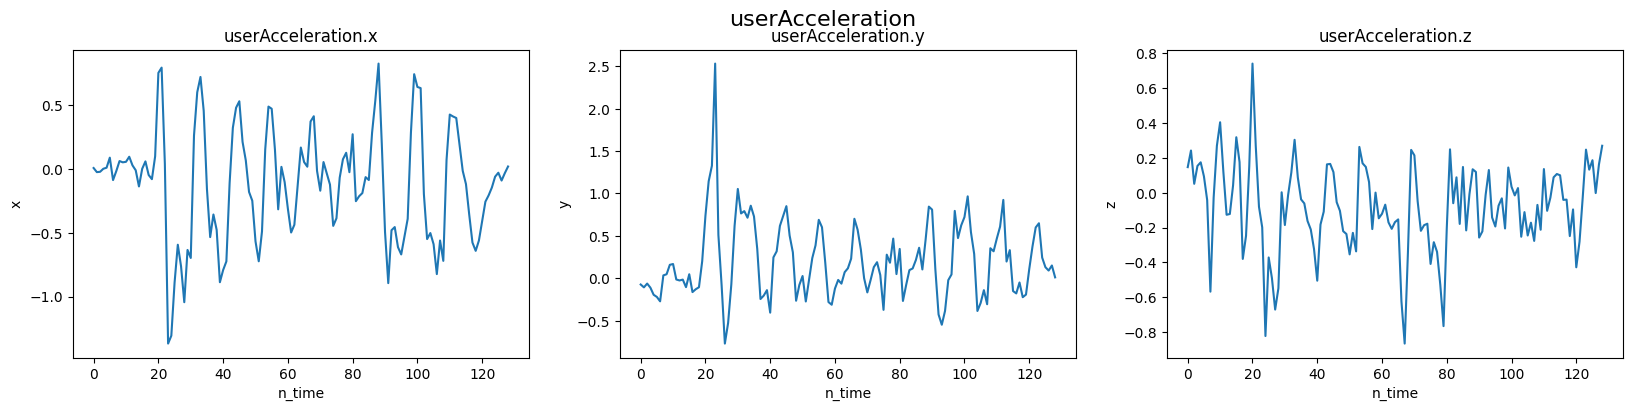

In [20]:
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    for num in range(1, 3):
        file = open(f'MotionData/InHandWalking/in_hand_walking_{num}.json')
        data = json.load(file)
        df = pd.json_normalize(data)
        df.drop(['timestamp'], axis=1, inplace=True)
        fig, ax = plt.subplots(1, 3, figsize=(20, 4))
        fig.suptitle(group_name, fontsize=16)

        elem_name = []
        if group_name == 'attitude':
            elem_name = ['pitch', 'roll', 'yaw']
        else:
            elem_name = ['x', 'y', 'z']
        for i in range(3):
            metric_name = f'{group_name}.{elem_name[i]}'
            ax[i].plot(df.index, df[metric_name])
            ax[i].set_title(metric_name)
            ax[i].set_xlabel('n_time')
            ax[i].set_ylabel(elem_name[i])

In [21]:
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    elem_name = []
    if group_name == 'attitude':
        elem_name = ['pitch', 'roll', 'yaw']
    else:
        elem_name = ['x', 'y', 'z']
    for i in range(3):
        for num in range(1, 3):
            file = open(f'MotionData/InHandWalking/in_hand_walking_{num}.json')
            data = json.load(file)
            df = pd.json_normalize(data)
            df.drop(['timestamp'], axis=1, inplace=True)

            metric_name = f'{group_name}.{elem_name[i]}'
            print(metric_name, '\t', round(np.min(df[metric_name]), 3), round(np.mean(df[metric_name]), 3), round(np.max(df[metric_name]), 3))

attitude.pitch 	 -1.556 -0.899 0.625
attitude.pitch 	 -1.342 -0.45 0.896
attitude.roll 	 -3.12 0.813 3.123
attitude.roll 	 -2.723 -1.375 0.084
attitude.yaw 	 -3.14 -0.138 3.141
attitude.yaw 	 -3.119 -0.293 3.12
gravity.x 	 -0.994 -0.028 0.456
gravity.x 	 -0.995 -0.57 0.083
gravity.y 	 -0.585 0.673 1.0
gravity.y 	 -0.781 0.379 0.974
gravity.z 	 -0.999 -0.098 0.502
gravity.z 	 -0.989 -0.135 0.391
rotationRate.x 	 -3.823 0.031 6.016
rotationRate.x 	 -4.505 0.266 4.122
rotationRate.y 	 -8.9 -0.0 6.445
rotationRate.y 	 -6.144 -0.124 3.453
rotationRate.z 	 -9.655 -0.007 6.47
rotationRate.z 	 -3.747 0.039 7.794
userAcceleration.x 	 -1.398 -0.032 1.001
userAcceleration.x 	 -1.368 -0.122 0.823
userAcceleration.y 	 -0.909 0.069 1.245
userAcceleration.y 	 -0.769 0.199 2.531
userAcceleration.z 	 -1.427 -0.039 1.232
userAcceleration.z 	 -0.865 -0.082 0.74


Ходьба очевидно увиличила границы практически каждой метрики. Благодаря этому если сравнивать состояние `walk` и `stay` можно прямо опираться на то, в каких пределах изменяются метрики. А вот возможно ли сравнить состояние `hand_walking` или `pocket_walking`?

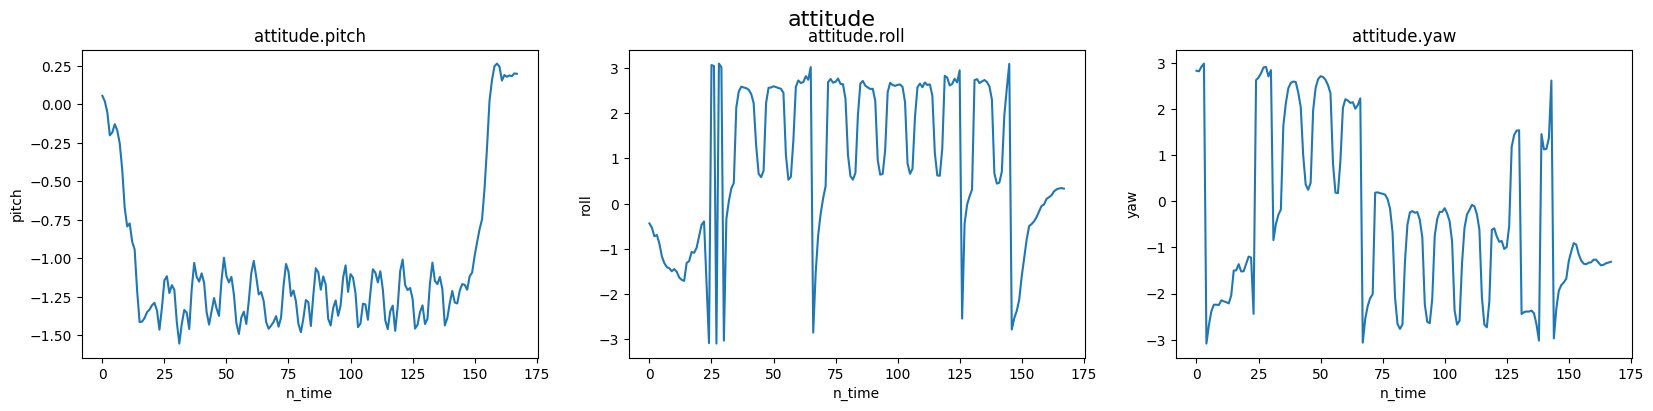

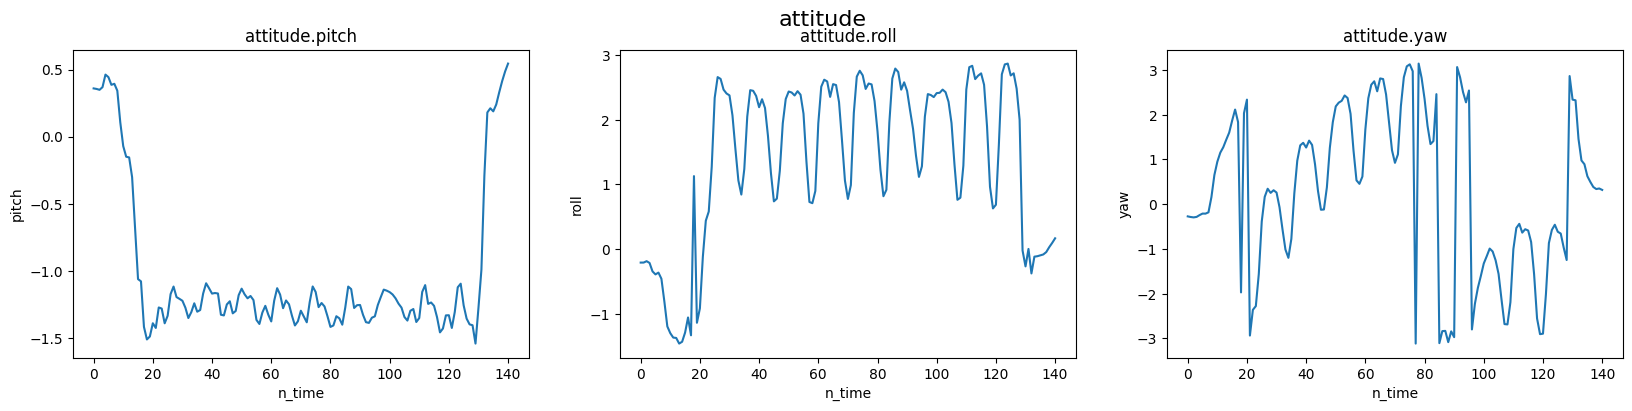

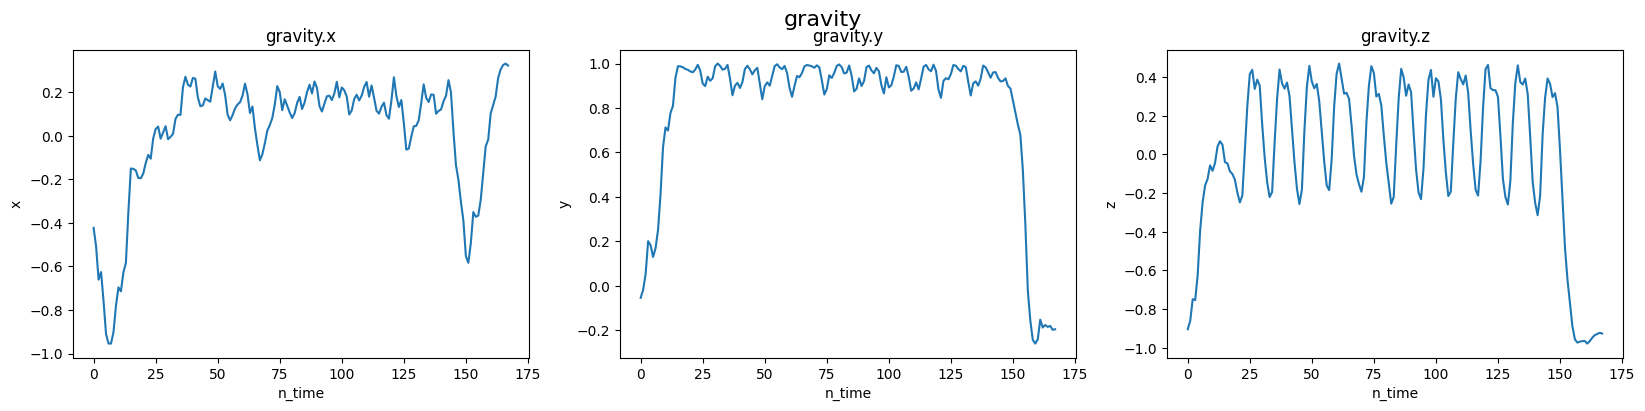

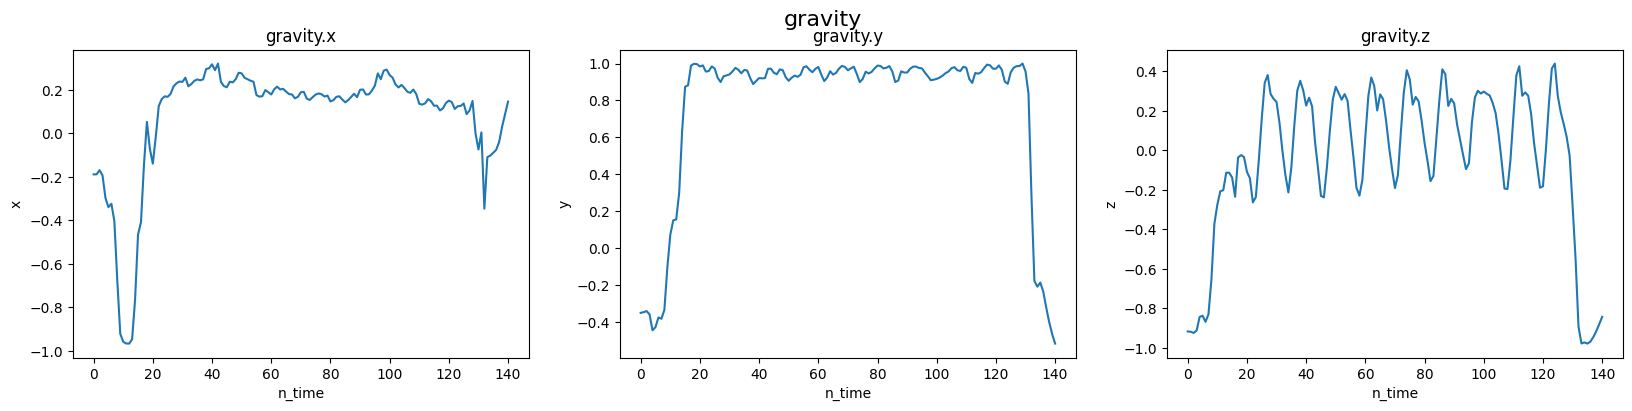

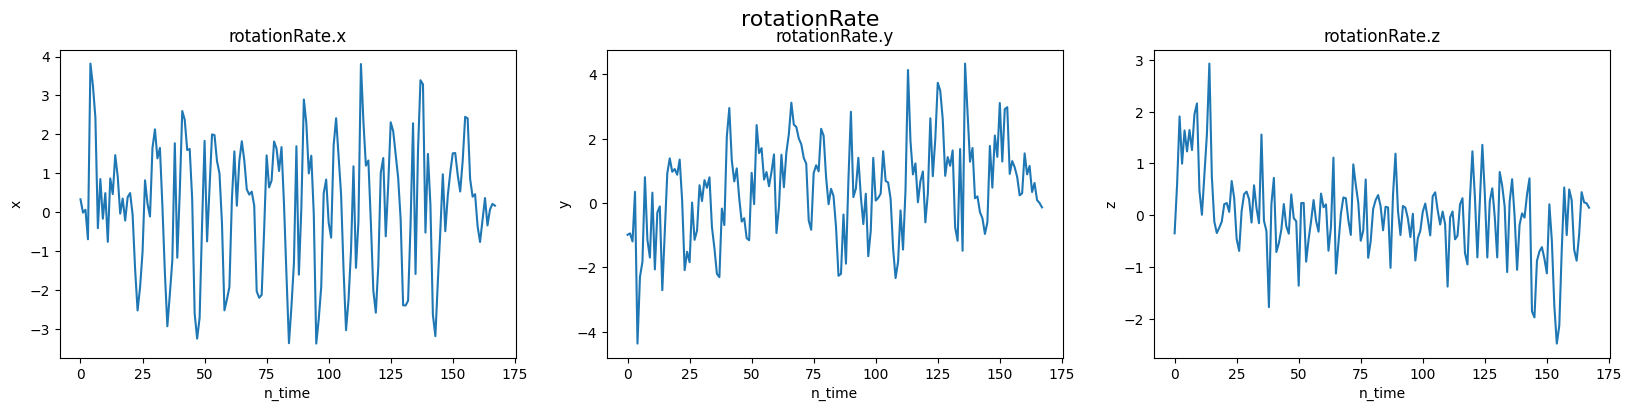

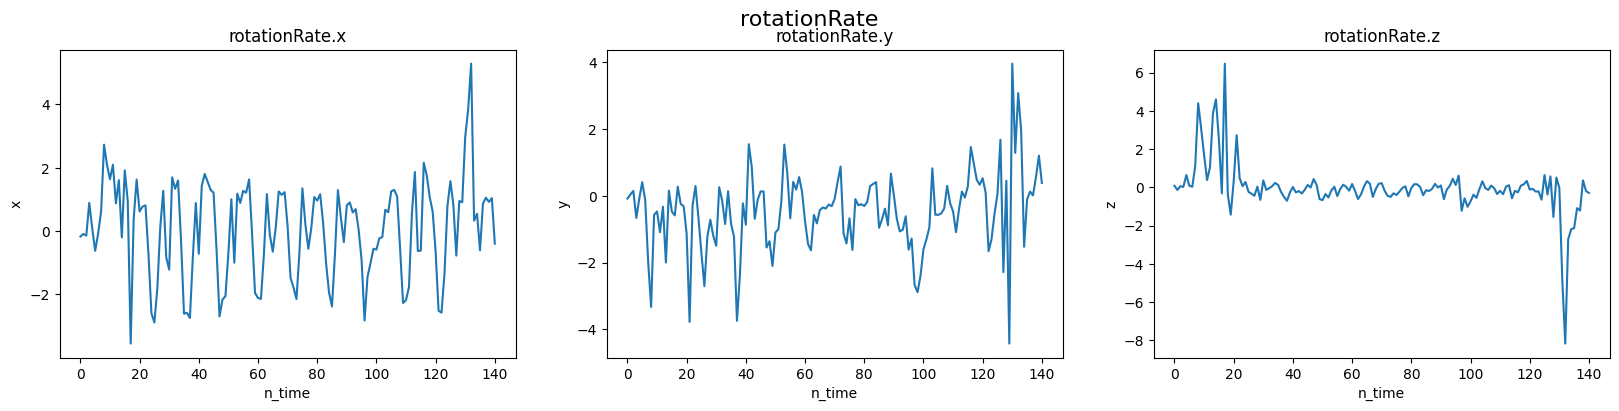

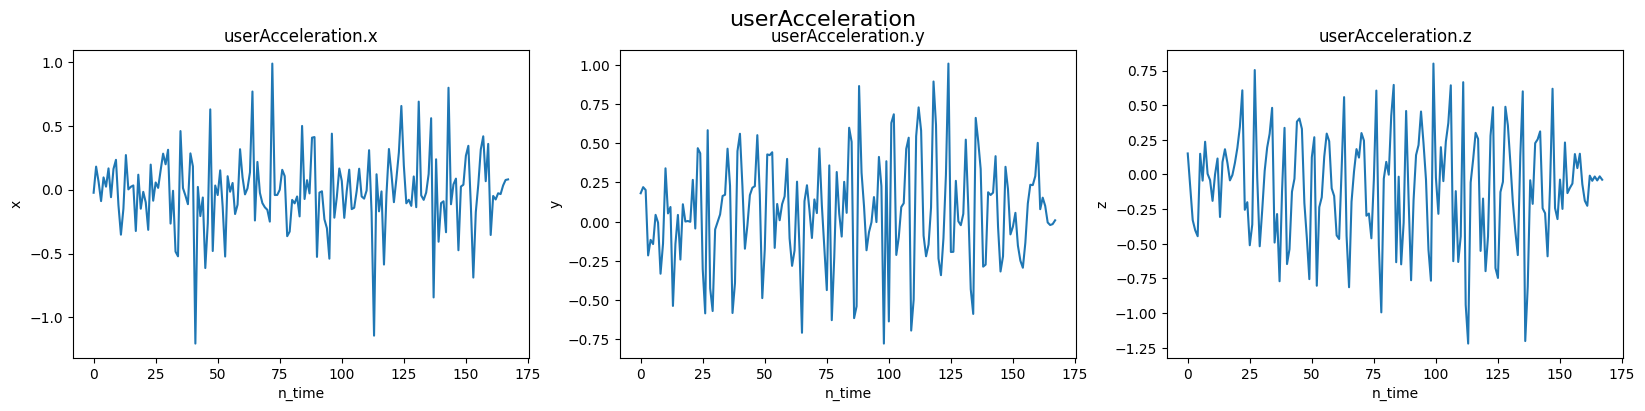

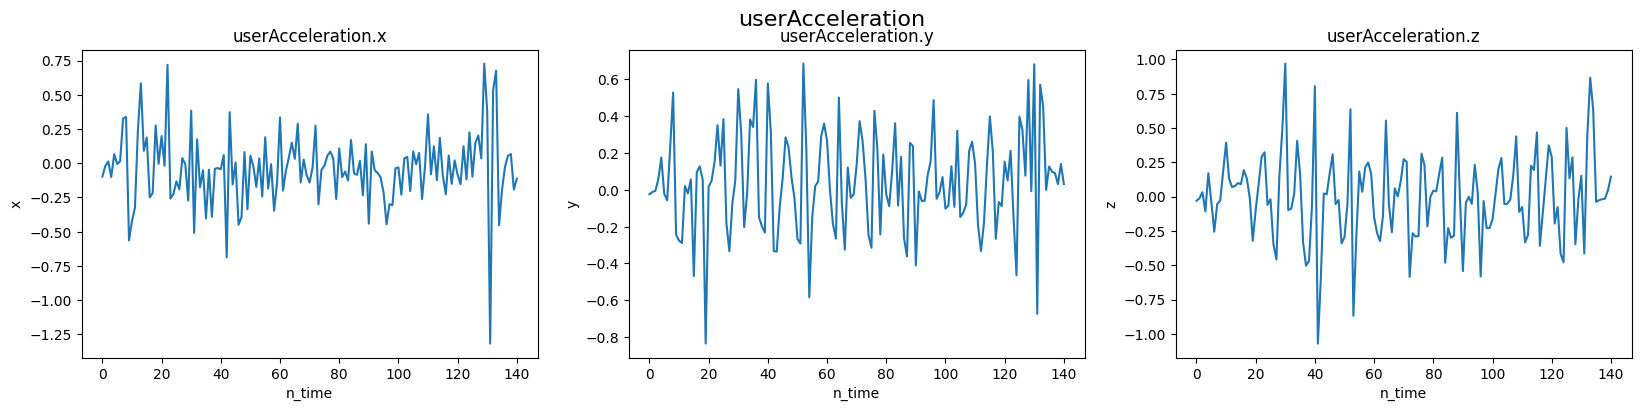

In [22]:
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    for num in range(2, 4):
        file = open(f'MotionData/InPocketWalking/in_pocket_walking_{num}.json')
        data = json.load(file)
        df = pd.json_normalize(data)
        df.drop(['timestamp'], axis=1, inplace=True)
        fig, ax = plt.subplots(1, 3, figsize=(20, 4))
        fig.suptitle(group_name, fontsize=16)

        elem_name = []
        if group_name == 'attitude':
            elem_name = ['pitch', 'roll', 'yaw']
        else:
            elem_name = ['x', 'y', 'z']
        for i in range(3):
            metric_name = f'{group_name}.{elem_name[i]}'
            ax[i].plot(df.index, df[metric_name])
            ax[i].set_title(metric_name)
            ax[i].set_xlabel('n_time')
            ax[i].set_ylabel(elem_name[i])

In [23]:
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    elem_name = []
    if group_name == 'attitude':
        elem_name = ['pitch', 'roll', 'yaw']
    else:
        elem_name = ['x', 'y', 'z']
    for i in range(3):
        for num in range(2, 4):
            file = open(f'MotionData/InPocketWalking/in_pocket_walking_{num}.json')
            data = json.load(file)
            df = pd.json_normalize(data)
            df.drop(['timestamp'], axis=1, inplace=True)

            metric_name = f'{group_name}.{elem_name[i]}'
            print(metric_name, '\t', round(np.min(df[metric_name]), 3), round(np.mean(df[metric_name]), 3), round(np.max(df[metric_name]), 3))

attitude.pitch 	 -1.553 -1.069 0.264
attitude.pitch 	 -1.544 -1.027 0.544
attitude.roll 	 -3.1 0.987 3.102
attitude.roll 	 -1.452 1.384 2.863
attitude.yaw 	 -3.084 -0.347 2.986
attitude.yaw 	 -3.114 0.307 3.141
gravity.x 	 -0.954 0.014 0.33
gravity.x 	 -0.967 0.076 0.32
gravity.y 	 -0.261 0.804 1.0
gravity.y 	 -0.518 0.758 1.0
gravity.z 	 -0.978 -0.001 0.469
gravity.z 	 -0.978 -0.038 0.438
rotationRate.x 	 -3.368 0.173 3.818
rotationRate.x 	 -3.554 0.079 5.283
rotationRate.y 	 -4.365 0.435 4.329
rotationRate.y 	 -4.431 -0.465 3.963
rotationRate.z 	 -2.481 0.01 2.932
rotationRate.z 	 -8.171 -0.047 6.47
userAcceleration.x 	 -1.204 -0.014 0.985
userAcceleration.x 	 -1.317 -0.04 0.728
userAcceleration.y 	 -0.777 0.058 1.007
userAcceleration.y 	 -0.834 0.043 0.684
userAcceleration.z 	 -1.22 -0.084 0.8
userAcceleration.z 	 -1.071 -0.001 0.969


Границы здесь стали чуть больше, но при этом невозможно однозначно назвать состояние `hand_walking` или `pocket_walking`

# Более сложные метрики

- Очевидно, что смотреть отдельно на каждую координату немного неправильно. Один из самых простых способов - это считать расстояние в 3х мерной плоскости и сравнивать это значение с предыдущим. Аналогично с гироскопом применяют сравнение угловых скоростей в единый момент времени

- Использования только этих данных - недостаточно (например, акселерометр может показывать большую разницу в значениях на грунтовой дороге, если человек едет на велосипеде). Множество современных способов определения состояния смартфона содержит еще такие признаки как: включён телефон или нет, насколько сместилось устройство по GPS трекеру, какую высоту изменил телефон относительно земли.

Хороший источник возможных решений и метрик: https://cs.adelaide.edu.au/~markus/pub/2017msthesis-VidiValiantoShaweddy.pdf

После занятий 18.11 нам дали подсказки как улучшить исследование - построить "ящики с усами" для нахождения границ. Сделаем это

In [24]:
# !pip install seaborn
# import seaborn as sns

# In hand staying

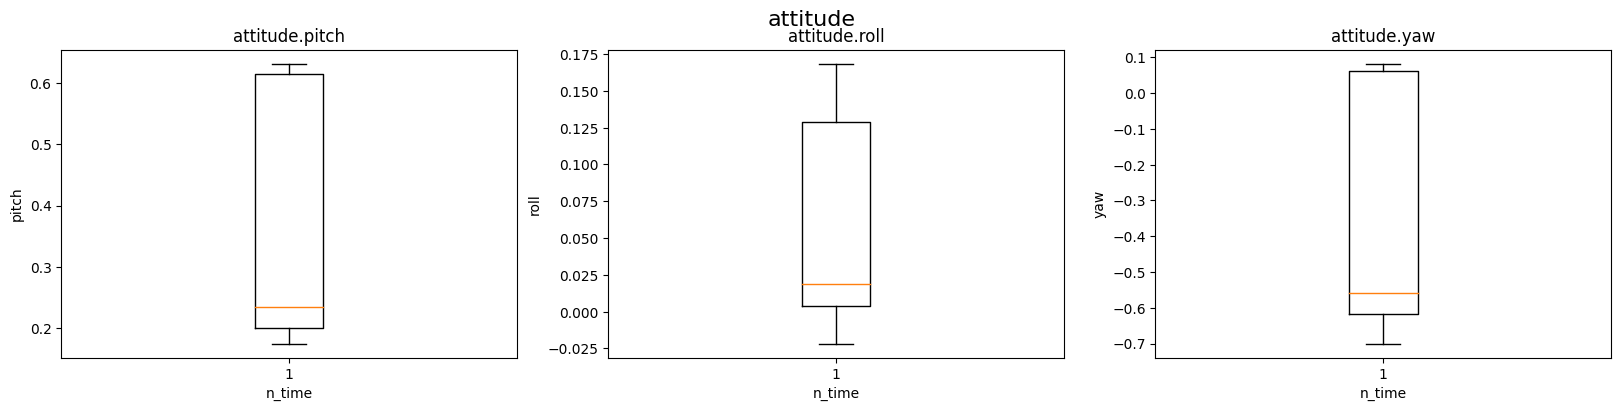

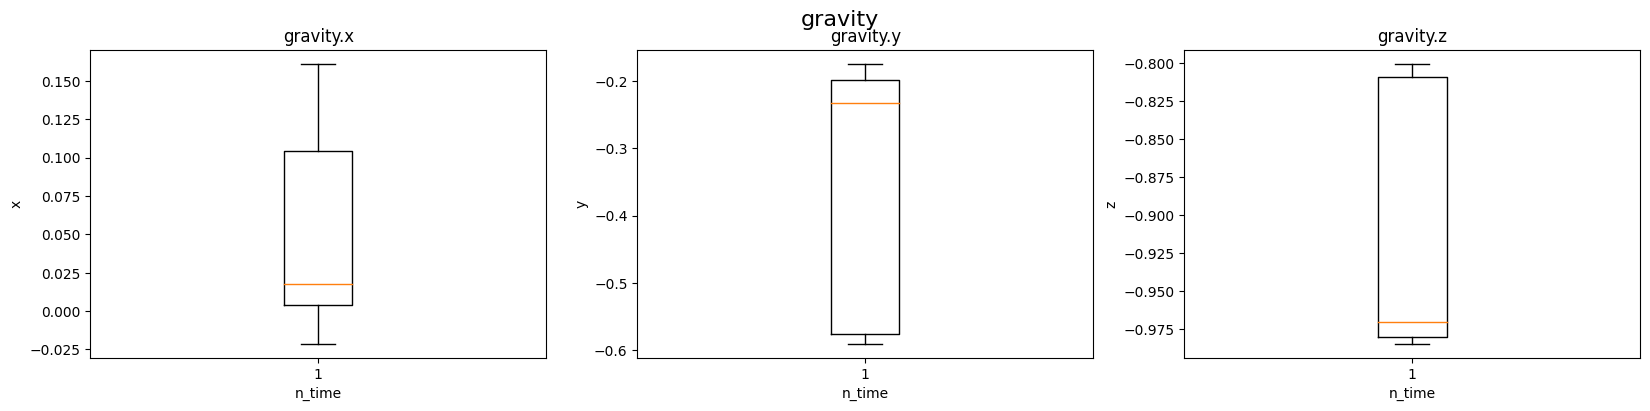

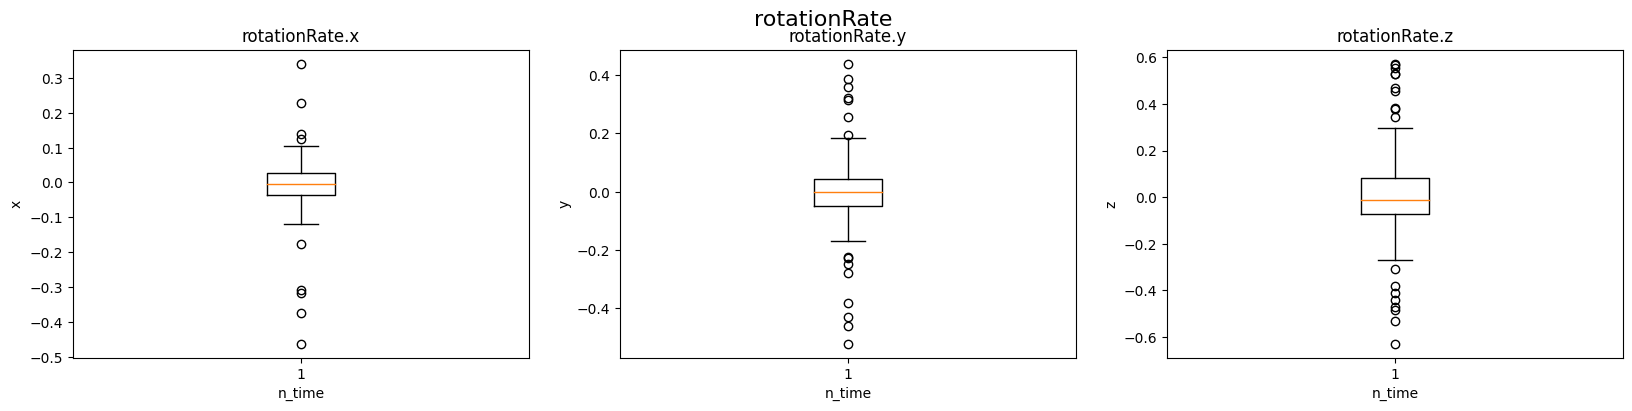

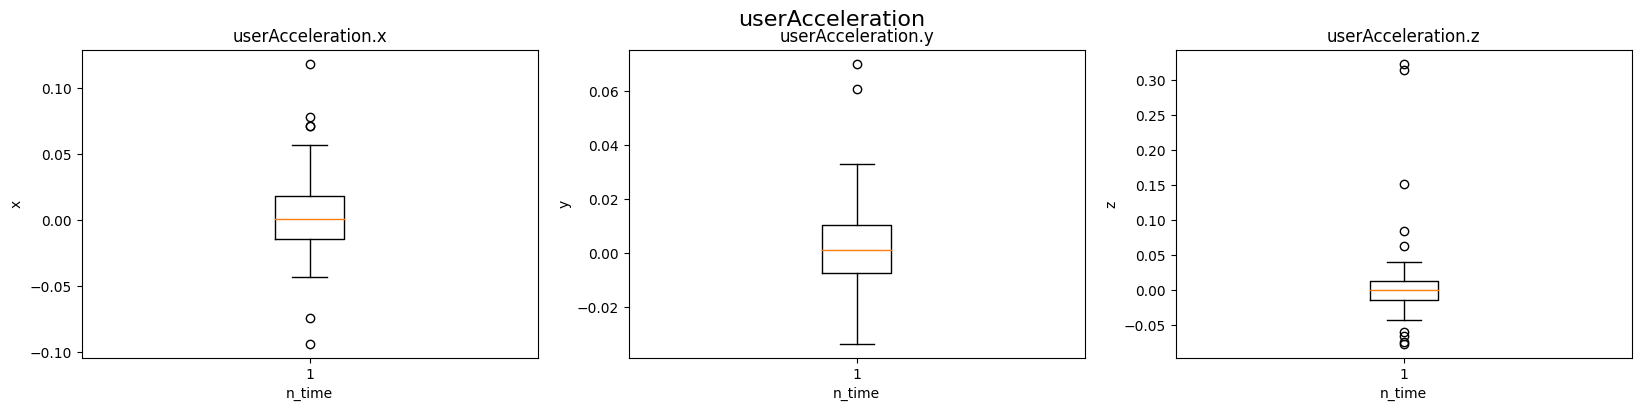

In [27]:
file = open('MotionData/InHandStaying/in_hand_staying_1.json')
data = json.load(file)
df = pd.json_normalize(data)
df.drop(['timestamp'], axis=1, inplace=True)
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    fig, ax = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle(group_name, fontsize=16)

    elem_name = []
    if group_name == 'attitude':
        elem_name = ['pitch', 'roll', 'yaw']
    else:
        elem_name = ['x', 'y', 'z']
    for i in range(3):
        metric_name = f'{group_name}.{elem_name[i]}'
        ax[i].boxplot(df[metric_name])
        ax[i].set_title(metric_name)
        ax[i].set_ylabel(elem_name[i])

# In hand walking

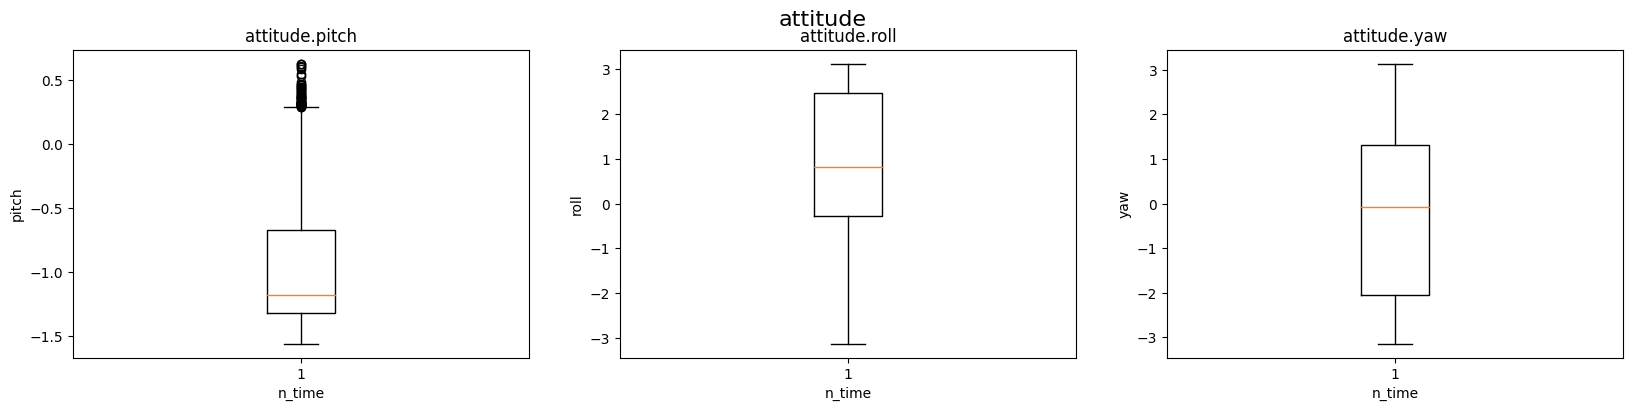

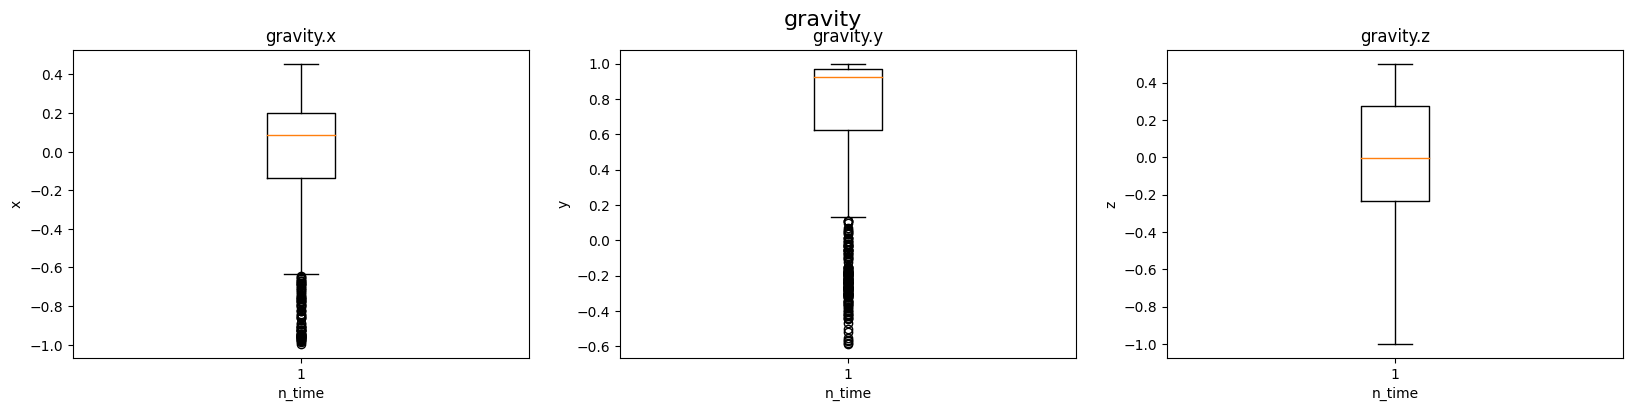

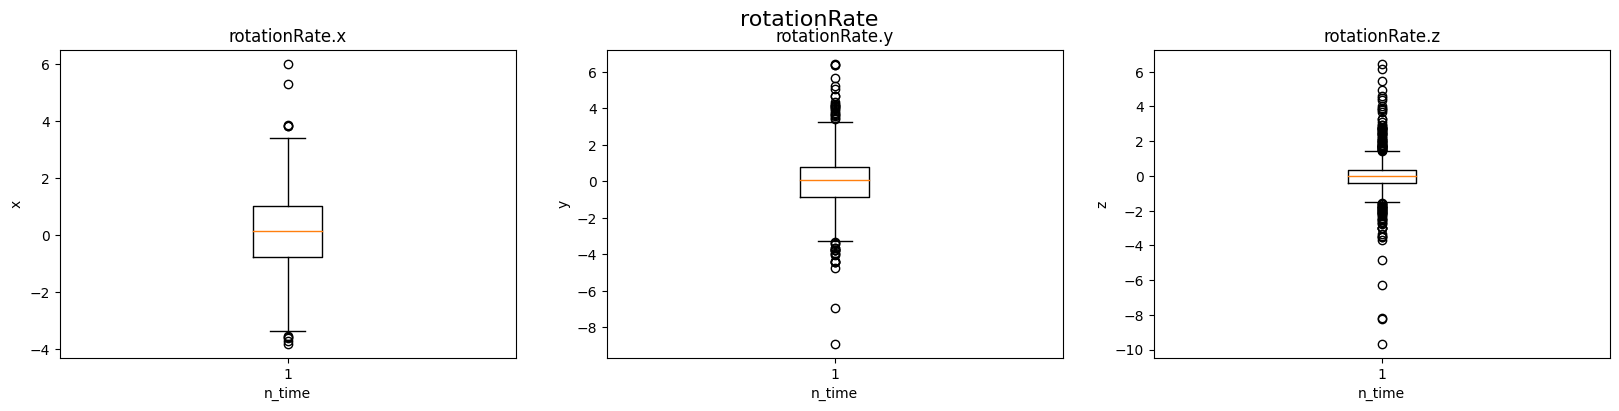

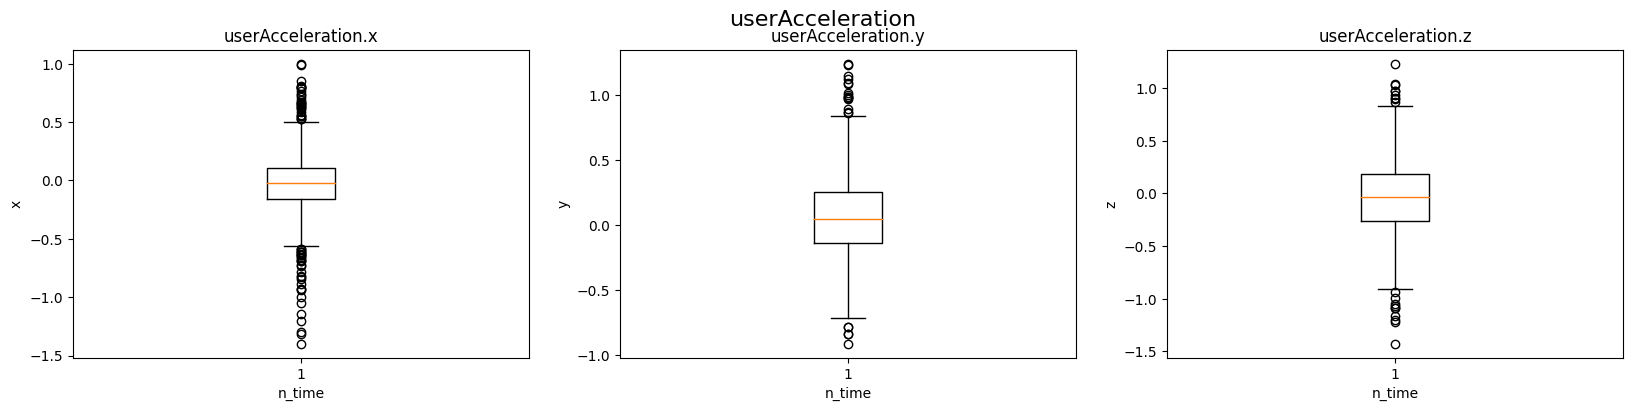

In [28]:
file = open('MotionData/InHandWalking/in_hand_walking_1.json')
data = json.load(file)
df = pd.json_normalize(data)
df.drop(['timestamp'], axis=1, inplace=True)
groups = ['attitude', 'gravity', 'rotationRate', 'userAcceleration']
for group_name in groups:
    fig, ax = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle(group_name, fontsize=16)

    elem_name = []
    if group_name == 'attitude':
        elem_name = ['pitch', 'roll', 'yaw']
    else:
        elem_name = ['x', 'y', 'z']
    for i in range(3):
        metric_name = f'{group_name}.{elem_name[i]}'
        ax[i].boxplot(df[metric_name])
        ax[i].set_title(metric_name)
        ax[i].set_ylabel(elem_name[i])

По наблюдениям отлично подходит метрика `userAcceleration` для распознавания состояния покоя или ходьбы - в этом мы еще раз убедились

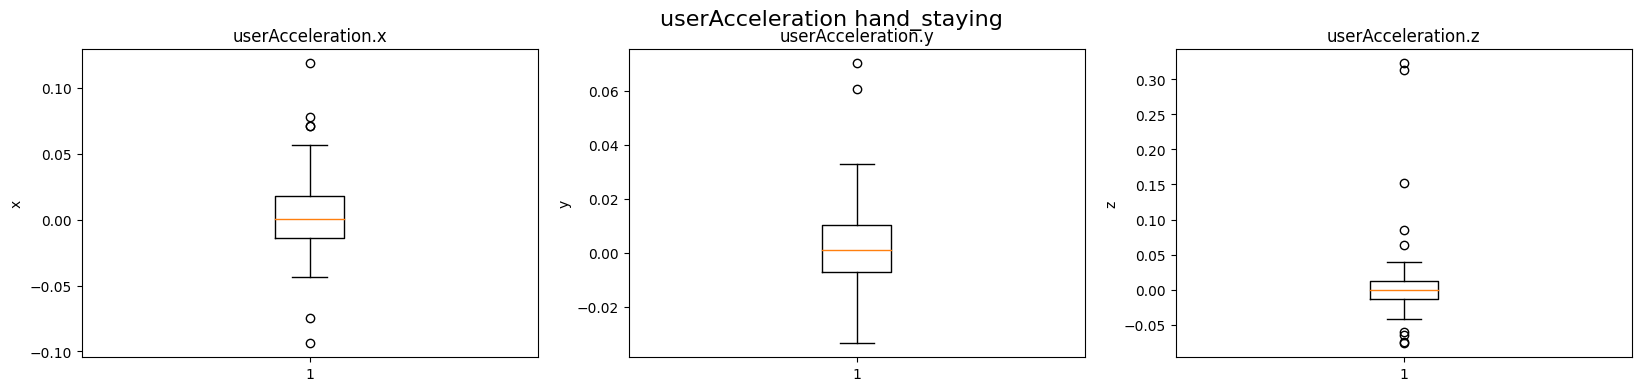

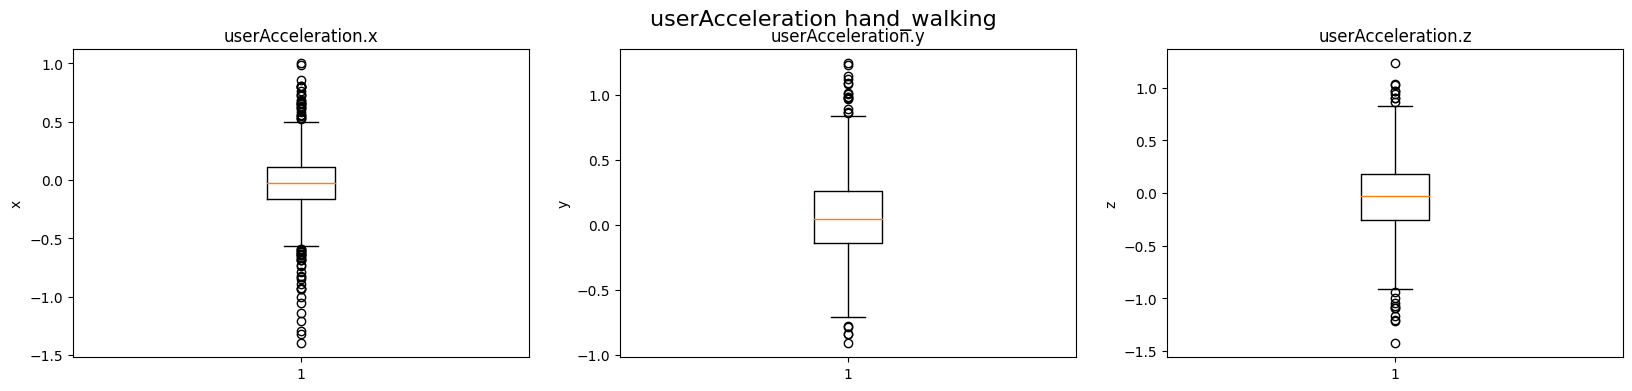

In [30]:
file_stay = open('MotionData/InHandStaying/in_hand_staying_1.json')
file_walk = open('MotionData/InHandWalking/in_hand_walking_1.json')
data_stay = json.load(file_stay)
data_walk = json.load(file_walk)
df_stay = pd.json_normalize(data_stay)
df_stay.drop(['timestamp'], axis=1, inplace=True)
df_walk = pd.json_normalize(data_walk)
df_walk.drop(['timestamp'], axis=1, inplace=True)
groups = ['userAcceleration']
for group_name in groups:
    fig, ax = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle(group_name + ' hand_staying', fontsize=16)
    elem_name = ['x', 'y', 'z']
    for i in range(3):
        metric_name = f'{group_name}.{elem_name[i]}'
        ax[i].boxplot(df_stay[metric_name])
        ax[i].set_title(metric_name)
        ax[i].set_ylabel(elem_name[i])

for group_name in groups:
    fig, ax = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle(group_name + ' hand_walking', fontsize=16)
    elem_name = ['x', 'y', 'z']
    for i in range(3):
        metric_name = f'{group_name}.{elem_name[i]}'
        ax[i].boxplot(df_walk[metric_name])
        ax[i].set_title(metric_name)
        ax[i].set_ylabel(elem_name[i])